In [8]:
# -*- coding: utf-8 -*-
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or
# implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#

### Adam Candrák/Mária Matušisková - 50%/50%

# Imports

In [9]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt
import seaborn as sns

# Phase 1 - Exploratory analysis

## 1.1 Basic description of the data together with characteristics
### EDA with visualization
-------------------------------------------------------------------------------------------
#### Analysis of data structures such as files (structures and relations, number, types, ...), records (structures, number of records, number of attributes, types, ...)


#### *1. Load dataset Profiles*

In [10]:
connections_file = "../data/Connections.csv"
devices_file = "../data/Devices.csv"
processes_file = "../data/Processes.csv"
profiles_file = "../data/Profiles.csv"

connections = pd.read_csv(connections_file, sep='\t')
devices = pd.read_csv(devices_file, sep='\t')
processes = pd.read_csv(processes_file, sep='\t')
profiles = pd.read_csv(profiles_file, sep='\t')

- **Profiles** - The dataset contains user data. The dataset has these attributes:
    - username
    - ssn - the social security number
    - mail - email of the user
    - residence
    - birthdate
    - imei - International Mobile Equipment Identity - It is a unique number that helps identify device or track it when it is lost. Furthermore, it is preventing from unauthorized network access.
    - user_id
    - registration
    - job
    - company
    - address
    - name 
    

In [11]:
profiles.columns

Index(['username', 'ssn', 'mail', 'residence', 'birthdate', 'imei', 'user_id',
       'registration', 'job', 'company', 'address', 'name'],
      dtype='object')

Types of the columns:

In [5]:
profiles.dtypes

username        object
ssn             object
mail            object
residence       object
birthdate       object
imei             int64
user_id          int64
registration    object
job             object
company         object
address         object
name            object
dtype: object

The size of the dataset is 31 044.

In [6]:
profiles.size

31044

Shows the first lines of the dataset.

In [7]:
profiles.head()

,username,ssn,mail,residence,birthdate,imei,user_id,registration,job,company,address,name
0,joy86,312-79-2503,marc49@gmail.com,NaN,1943-08-29,3590433799317661966,1888,"04/07/2021, 00:00:00",Market researcher,Simpson Inc,"9105 Cox Curve Apt. 055\nPricemouth, AR 23186",Dakota Stark
1,andrewturner,275-09-2121,sedwards@hotmail.com,"75135 Smith Square\nPort Nathan, AR 79925",1993-03-09,3590433799317661792,1942,2021-05-21,"Administrator, local government","Deleon, Duncan and Garcia",NaN,Valerie Mitchell
2,rogersrobert,592-96-3718,martinhuber@gmail.com,NaN,1935-10-23,8630330696303482253,598,"03/24/2024, 00:00:00",NaN,Ramirez PLC,NaN,Michael Martin
3,bethany94,171-66-6416,kwilliams@yahoo.com,NaN,2021-04-12,863033069630348065,1070,2021-03-31,NaN,Lane Ltd,USNV Castro\nFPO AE 61560,Bruce Williams
4,nathanmoore,149-50-1186,shardy@yahoo.com,NaN,2019-11-10,863033069630348081,1369,2022-06-26,Sports therapist,Smith Group,"4986 Richard Ford\nPort Susanport, DC 06966",Tara Wood


See more info about the dataset... There is a rule that the columns should not have null values.

In [8]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2587 entries, 0 to 2586
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   username      2587 non-null   object
 1   ssn           2587 non-null   object
 2   mail          2587 non-null   object
 3   residence     905 non-null    object
 4   birthdate     1423 non-null   object
 5   imei          2587 non-null   int64 
 6   user_id       2587 non-null   int64 
 7   registration  2587 non-null   object
 8   job           776 non-null    object
 9   company       2587 non-null   object
 10  address       2199 non-null   object
 11  name          2587 non-null   object
dtypes: int64(2), object(10)
memory usage: 242.7+ KB


Let's see the descriptive statistics for data distribution:
- count - the final number of the non-null values
- mean - the average of the values in the each column
- std - the standard deviation (how spread out the data are)
- min - the smallest value in the each column
- 25% - the value closest to the 25% metric of data
- 50% - the value closest to the 50% metric of data
- 75% - the value closest to the 75% metric of data
- max - the highest value in the each column

In [9]:
profiles.describe()

,imei,user_id
count,2.587000e+03,2587.000000
mean,3.978629e+18,1309.511403
std,3.361321e+18,748.646640
min,3.590434e+17,0.000000
25%,8.630331e+17,659.500000
50%,3.590434e+18,1292.000000
75%,8.630331e+18,1953.000000
max,8.630331e+18,2586.000000


In [10]:
profiles.describe(exclude=np.number)

,username,ssn,mail,residence,birthdate,registration,job,company,address,name
count,2587,2587,2587,905,1423,2587,776,2587,2199,2587
unique,2547,2587,2574,905,1394,2291,451,2427,2199,2530
top,nanderson,312-79-2503,csmith@hotmail.com,"75135 Smith Square\nPort Nathan, AR 79925",1911-05-11,2023/02/02,Chartered loss adjuster,Smith PLC,"9105 Cox Curve Apt. 055\nPricemouth, AR 23186",Kimberly Williams
freq,3,1,2,1,2,3,7,7,1,4


Number of rows and columns:

In [11]:
profiles.shape

(2587, 12)

#### *3. Analyze Data Structure*

- **Profiles**

Count elements (distinct)

In [12]:
profiles.nunique()

username        2547
ssn             2587
mail            2574
residence        905
birthdate       1394
imei             497
user_id         1633
registration    2291
job              451
company         2427
address         2199
name            2530
dtype: int64

-----------------------------------------------------
#### Analysis of individual attributes: for selected significant attributes (min 10), analyze their distributions and basic descriptive statistics.

Summarize the distribution of various usages of apps, while excluding imei and ts, because those are not numerical values.

Text(0.5, 1.0, 'Box Plot of Profiles Data')

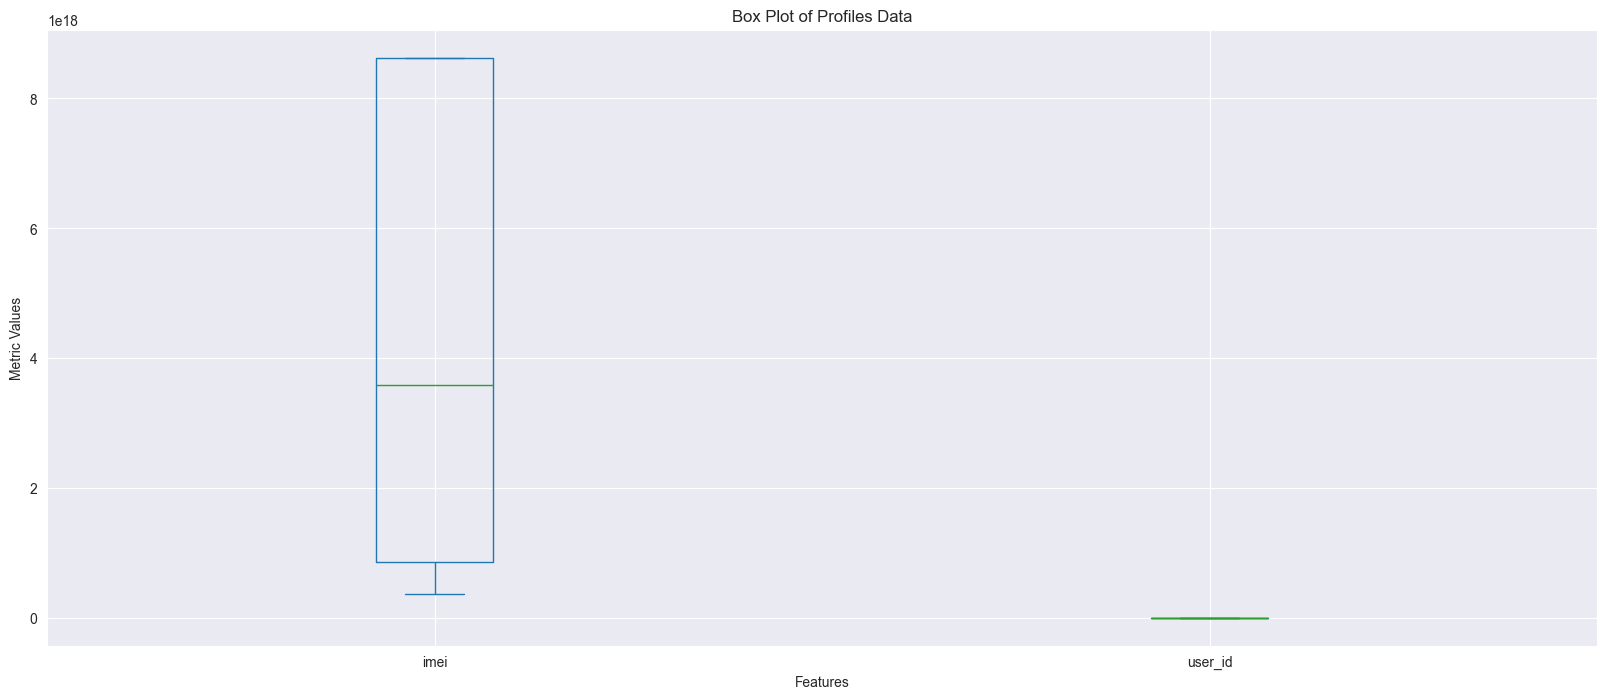

In [13]:
fig, ax = plt.subplots(figsize=(20, 8))

profiles[profiles.columns.difference(['username', 'ssn', 'mail', 'residence', 'birthdate', 'registration', 'job', 'company', 'address', 'name'])].plot.box(ax=ax)

plt.xlabel('Features')
plt.ylabel('Metric Values')
plt.title('Box Plot of Profiles Data')

Occurrence of values from the column imei:

<Axes: ylabel='Frequency'>

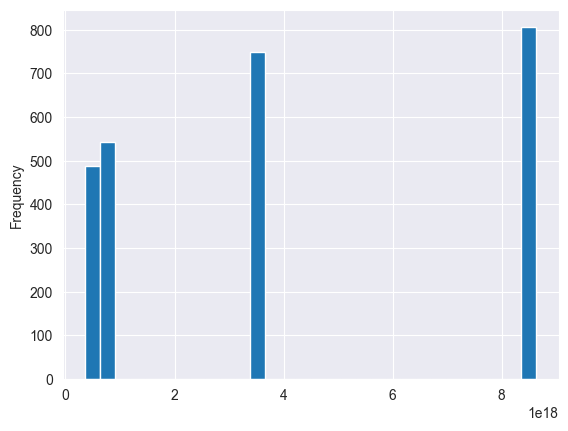

In [12]:
profiles['imei'].plot.hist(bins=30)

Occurrence of values from the column user_id:

<Axes: ylabel='Frequency'>

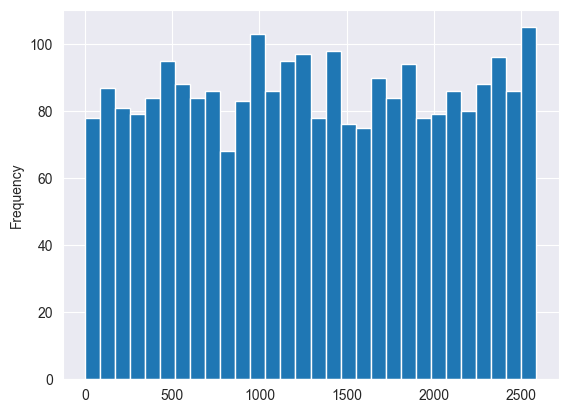

In [18]:
profiles['user_id'].plot.hist(bins=30)

Data distribution:

<Axes: xlabel='imei', ylabel='Count'>

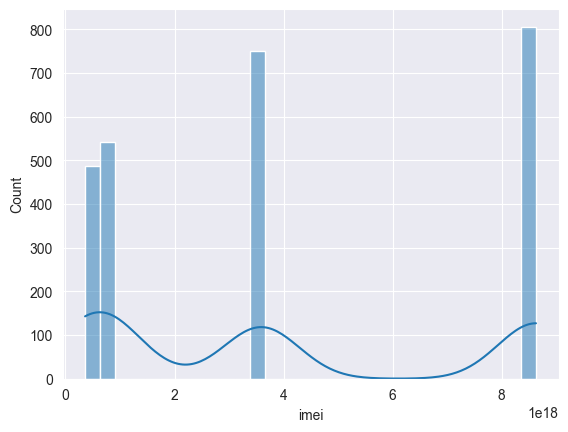

In [17]:
sns.histplot(profiles['imei'], kde=True, bins=30)

Create a boxplot for column user_id, the median is between 1500 and 1000:

<Axes: ylabel='user_id'>

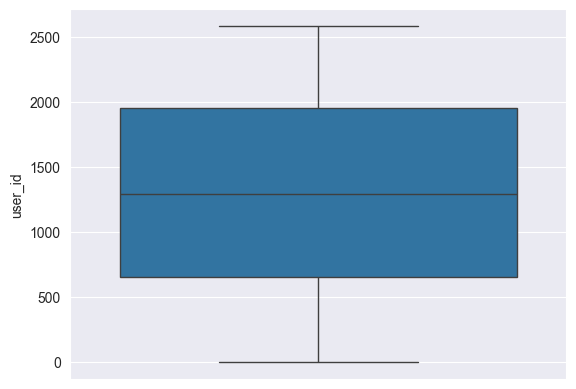

In [19]:
sns.boxplot(profiles['user_id'])

---------------------------------------------------
#### Pairwise data analysis: Identify relationships and dependencies between pairs of attributes.

Calculate correlations:

In [20]:
profiles_data = profiles[['imei', 'user_id']]
profiles_data.corr()

,imei,user_id
imei,1.000000,0.009667
user_id,0.009667,1.000000



Bivariate analysis = Pair analysis. To see correlation between two variables/attributes

<Axes: xlabel='imei', ylabel='user_id'>

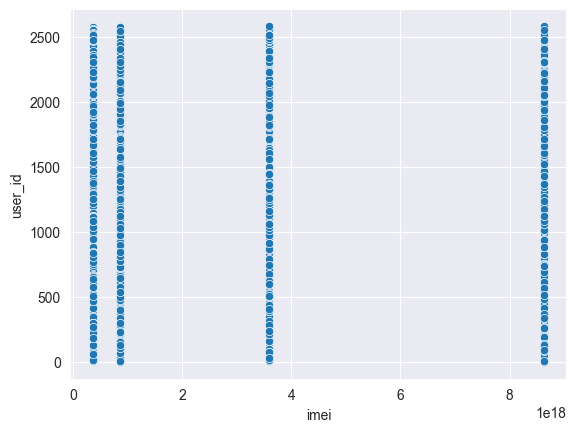

In [21]:
sns.scatterplot(data=profiles, x='imei', y='user_id')

Compare the distribution between columns imei and user_id:

<Axes: xlabel='imei', ylabel='user_id'>

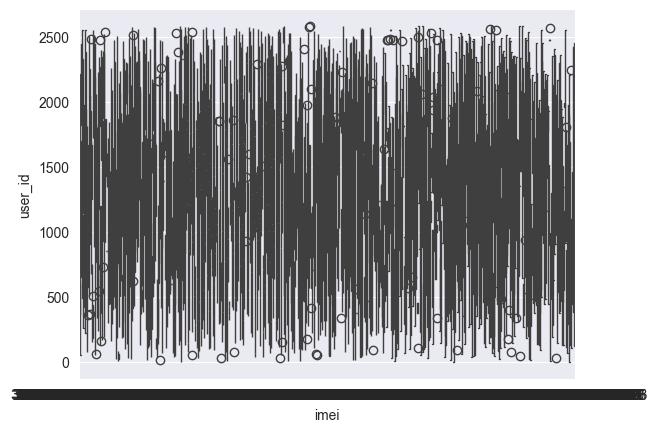

In [28]:
sns.boxplot(x='imei', y='user_id', data=profiles)

Correlation - how strong linear relationship is of the two values

Pearson correlation: 0.010


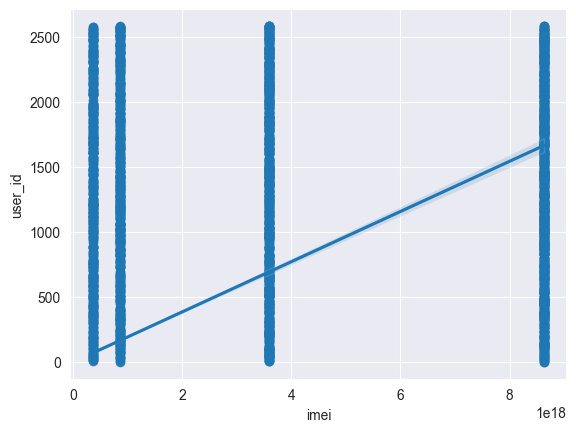

In [25]:
sns.regplot(x="imei", y="user_id", data=profiles)
print("Pearson correlation: %.3f" % profiles['imei'].corr(profiles['user_id']))

Correlation it the table, summary:

In [26]:
profiles.corr(numeric_only=True)

,imei,user_id
imei,1.000000,0.009667
user_id,0.009667,1.000000


Show correlations through heatmap to visualize numerical values between columns:

<Axes: >

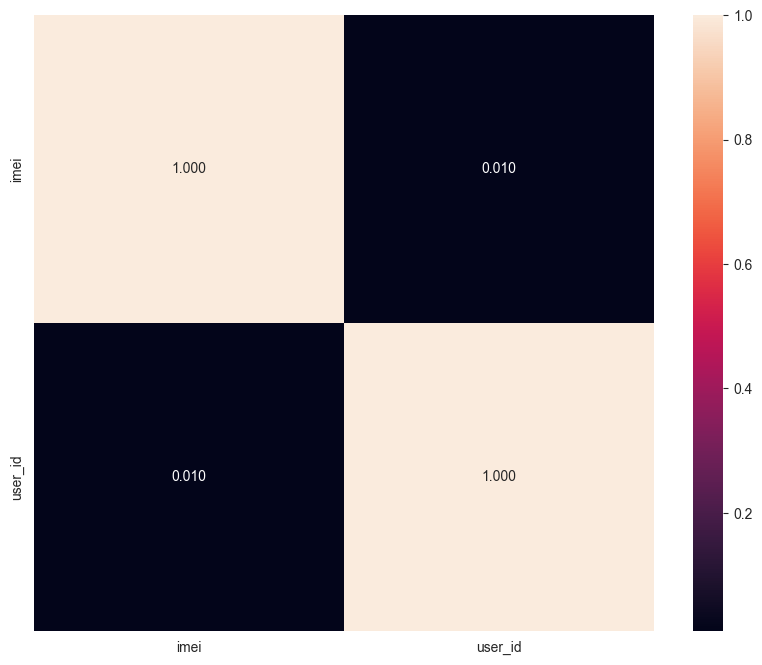

In [27]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(profiles.corr(numeric_only=True), ax=ax, annot=True, fmt=".3f")